### Alvins yrken för alla personer 

Läser alla personer från Alvin via webscrabing 
* Wikidata [P6821](https://www.wikidata.org/wiki/Property_talk:P6821)
* [T225522](https://phabricator.wikimedia.org/T225522) "Property Alvin P6821 created and need to be matched"

* GITHUB [salgo60/HISCOKoder](https://github.com/salgo60/HISCOKoder)
  * this [Notebook](https://github.com/salgo60/HISCOKoder/blob/main/Jupyter/Alvin%20yrken%20version%202.ipynb)

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-08-22 15:41:44.852111


In [2]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup, NavigableString, Tag
from tqdm.notebook import tqdm  

newList = []
urlBase = "https://www.alvin-portal.org/alvin/view.jsf?pid="
#for index, row in tqdm(total=WDAlvintot.shape[0]):    
for i in tqdm(range(83000)):
    alvinid = "alvin-person:" + str(i)
    url = urlBase + alvinid
#    print(url)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    for header in soup.find_all('h2'): 
        nextNode = header
        if "Occupation" in header:
            while True:
            
                nextNode = nextNode.nextSibling
                if nextNode is None:
                    break
                if isinstance(nextNode, NavigableString):
#                    print (alvinid,"-","\tyrke: ",nextNode.strip())
#                    print (alvinid,"-",person,"\tyrke: ",nextNode.strip())
#alvin-person:1063 - Marie Curie 	yrke:  Fysiker, Radiolog, Kemist, Chemist, Physicist, kemist, fysiker
#alvin-person:48342 - Simone de Beauvoir 	yrke:  författare, filosof, feminist
#alvin-person:27012 - Ingmar Bergman 	yrke:  Regissör, Författare, regissör
#alvin-person:64330 - Grazia Deledda 	yrke:  Författarinna
#
#
                    newList.append(nextNode.strip())
                    break

print("Lines found:\t", len(newList))    
# TBD
    

  0%|          | 0/83000 [00:00<?, ?it/s]

Lines found:	 39715


In [8]:
import pandas as pd
newListdf = pd.DataFrame(newList,columns=list(["Yrke"]))

In [9]:
newListdf

,Yrke
0,"Chemist, Physiologist, Professor"
1,Författare
2,författare
3,"Physician, läkare"
4,författare
...,...
39710,"Konstnär, Tecknare, Arkitekt, Scenograf"
39711,"Konstnär, Tecknare, Scenograf"
39712,Målare
39713,Målare


In [10]:
yrkendf = pd.concat([pd.Series(row['Yrke'].split(','))              
                    for _, row in newListdf.iterrows()]).reset_index() 
yrkendf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63495 entries, 0 to 63494
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   63495 non-null  int64 
 1   0       63495 non-null  object
dtypes: int64(1), object(1)
memory usage: 992.2+ KB


In [13]:
mapping = {yrkendf.columns[1]:'yrke'}
yrkendf = yrkendf.rename(columns=mapping)
yrkendf["yrke"] = yrkendf['yrke'].str.strip().str.lower()
yrkenAlvin = yrkendf["yrke"].value_counts() 
yrkenAlvin

physician             7092
professor             5957
surgeon               1889
konstnär              1658
författare            1485
                      ... 
afrikaforskare           1
mjölnare                 1
writer on printing       1
professorska             1
lektor i metodik         1
Name: yrke, Length: 4691, dtype: int64

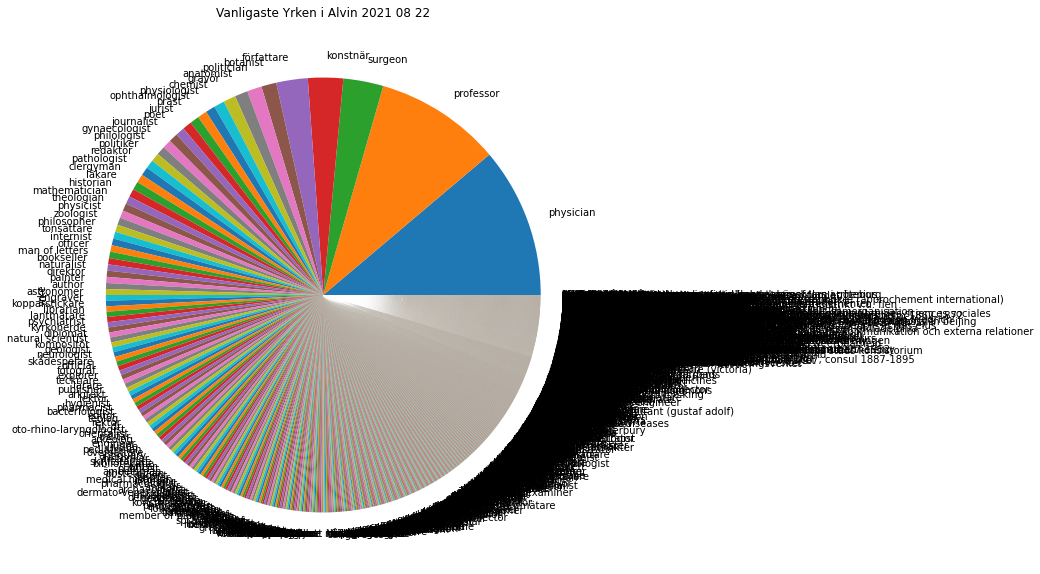

In [14]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10, 10))
#plt.rcParams["figure.figsize"] = (10,10)
ax = yrkenAlvin.plot(kind='pie')

ax.set_title("Vanligaste Yrken i Alvin " + start_time.strftime('%Y %m %d'))
plt.show()



In [15]:
#fig = pie[0].get_figure()
fig = ax.get_figure()
plt.rcParams['savefig.facecolor']='white'
fig.savefig("Alvin_yrken_alla_2.png")

In [16]:
yrkenAlvin.to_csv("Alvin_yrken_value_counts_2.csv")

In [17]:
end_time  = datetime.now()
print("Last run: ", end_time)

Last run:  2021-08-23 02:01:43.700641
